In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

#ML libraries
from sklearn.model_selection import train_test_split
import tensorflow as tf; from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

warnings.filterwarnings('ignore')

In [3]:
#Generation synthetic dataset
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)
labels = (features[:,0] + features[:, 1] > 1).astype(int)

In [4]:
#convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns = ['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

In [5]:
#Preprocess data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size = 0.2, random_state = 42)

In [26]:
#Build model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with one neuron for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])

#Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=10,validation_split = 0.2 )

Epoch 1/10
13/13 [==============================] - 1s 11ms/step - loss: 0.6792 - accuracy: 0.4531 - val_loss: 0.6694 - val_accuracy: 0.5000
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.4766 - val_loss: 0.6659 - val_accuracy: 0.5312
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.4922 - val_loss: 0.6621 - val_accuracy: 0.5312
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.5078 - val_loss: 0.6585 - val_accuracy: 0.5938
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6661 - accuracy: 0.5312 - val_loss: 0.6550 - val_accuracy: 0.6562
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6625 - accuracy: 0.5938 - val_loss: 0.6509 - val_accuracy: 0.6562
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6590 - accuracy: 0.6094 - val_loss: 0.6472 - val_accuracy: 0.6875
Epoch 8/10
13/13 [=

In [7]:
#Evaluate
loss, accuracy = model.evaluate(X_test,y_test)
print(f'Test Accuracy: {accuracy}')
print(f'Test Loss: {loss}')

2/2 [==============================] - 0s 4ms/step - loss: 0.7013 - accuracy: 0.3750
Test Accuracy: 0.375
Test Loss: 0.7012748122215271


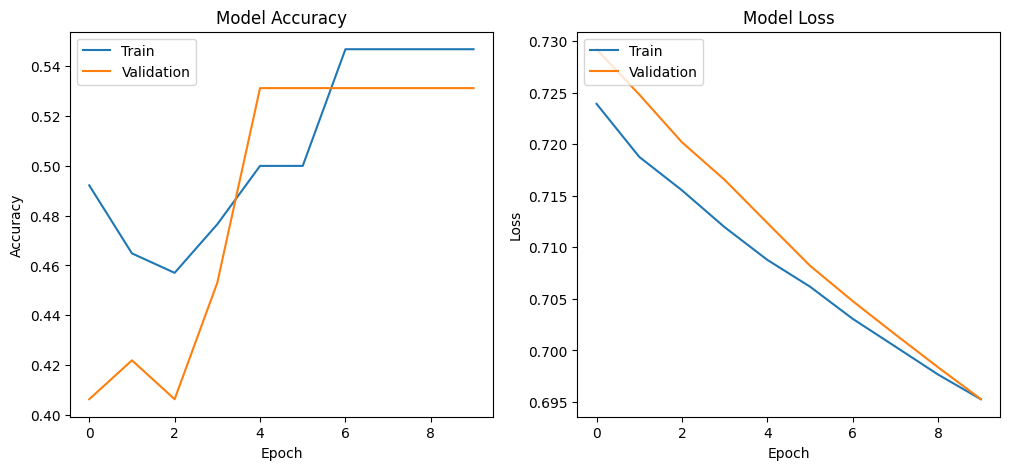

In [16]:
#Plotting the metrics
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc= 'upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc= 'upper left')

plt.show()


313/313 [==============================] - 0s 878us/step


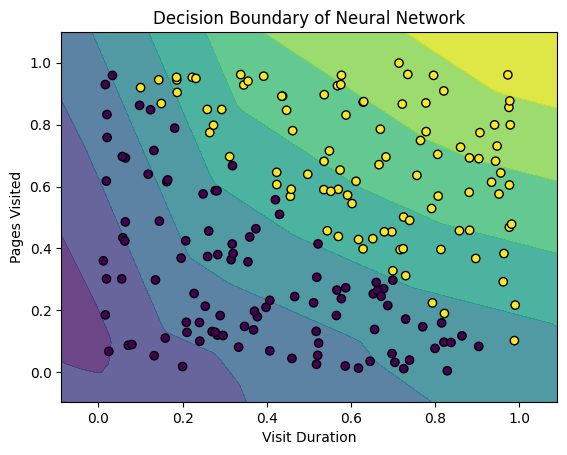

In [27]:
# Generating feature space grid
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()